### about Alzheimer: Alt와 알츠하이머

알츠하이머병은 기억력과 사고력을 서서히 파괴하고, 결국 가장 간단한 일을 수행할 수 있는 능력을 파괴하는 뇌 질환임.
이 질환을 앓고 있는 대부분의 사람들, 즉 후기 발병 유형의 증상을 가진 사람들은 60대 중반에 처음 나타난다고 함.

alt(alanine aminotransferase)의 수치가 낮을 수록 알츠하이머 병의 발병과 연관성이 깊으며 인지기능저하가 심하다고 함.

해당 데이터는 알츠하이머 환자들을 대상으로 여러 설문조사를 한 데이터로, 여러 습관 혹은 요인들이 alt 수치에 어떠한 영향을 미쳤는지, 즉 알츠하이머에 어떤 영향을 미쳤는지 판단하고자 함.

In [4]:
import pandas as pd
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df

C:\Users\user\AppData\Local\Temp\ipykernel_15280\3177052668.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,NaN,2021,2021,WEST,West,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,NaN,...,Q01,NaN,9004,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
1,NaN,2021,2021,NRE,Northeast,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,9001,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
2,NaN,2021,2021,MDW,Midwest,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,9002,AGE,5064,RACE,BLK,NaN,NaN,NaN
3,NaN,2021,2021,WEST,West,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,9004,AGE,65PLUS,OVERALL,OVERALL,NaN,NaN,NaN
4,NaN,2021,2021,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9002,AGE,65PLUS,RACE,HIS,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,NaN,2017,2017,WY,Wyoming,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,NaN,...,Q01,NaN,56,AGE,65PLUS,GENDER,MALE,NaN,NaN,NaN
250933,NaN,2016,2016,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,NaN,...,Q32,NaN,56,AGE,AGE_OVERALL,RACE,BLK,NaN,NaN,NaN
250934,NaN,2015,2015,WV,West Virginia,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,54,AGE,5064,GENDER,MALE,NaN,NaN,NaN
250935,NaN,2018,2018,WV,West Virginia,BRFSS,Nutrition/Physical Activity/Obesity,Obesity,Percentage of older adults who are currently o...,NaN,...,Q13,NaN,54,AGE,5064,GENDER,MALE,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       0 non-null       float64
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

### 데이터 전처리
어떤 데이터가 존재하는 지 확인하고, 데이터들의 타입들을 확인함.

해당 데이터를 확인해본 결과 YearStart와 YearEnd가 대부분 동일함. 따라서 관측값에 큰 결과를 미치지 않은 것으로 확인 (데이터 생략)
또한, location의 영향은 고려하지 않을 예정이므로 관측값에서 제외함.

결과적으로 모든 데이터가 null인 것을 제외하고 필요하다고 생각되는 아래의 데이터만 가져옴. 또한, Data_value_Alt의 결측치는 0으로 채웠음.

In [6]:
df1 = df[['Class', 'Topic','Data_Value_Alt', 'Stratification1', 'Stratification2']]
df1['Data_Value_Alt'] = df1['Data_Value_Alt'].fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_15280\1910821284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Data_Value_Alt'] = df1['Data_Value_Alt'].fillna(0)


In [7]:
df2 = df1.groupby(['Class', 'Topic', 'Stratification1', 'Stratification2'], as_index = False)[['Data_Value_Alt']].mean()

### 나이, 성별, 인종 분석

어떤 Class인지를 떠나 성별과 인종에서 알츠하이머의 현황이 어떠한 지 파악하고자 함.

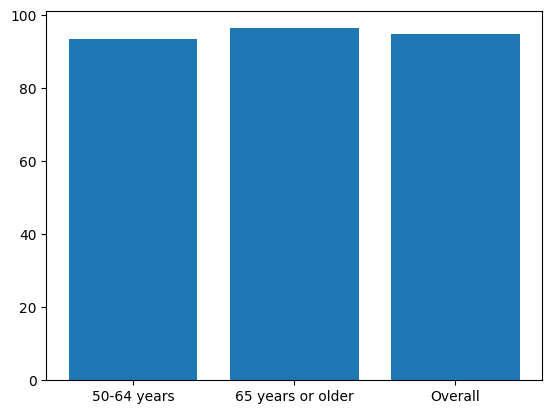

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(data = df2, x = 'Stratification1', height = 'Data_Value_Alt')
plt.show()

### 나이
우선적으로 65 years or older에서 alt의 값이 더 높다고 확인되나 미미한 차이임. 따라서 알츠하이머 환자에서 나이는 크게 영향을 미치지 않을 수도 있음.

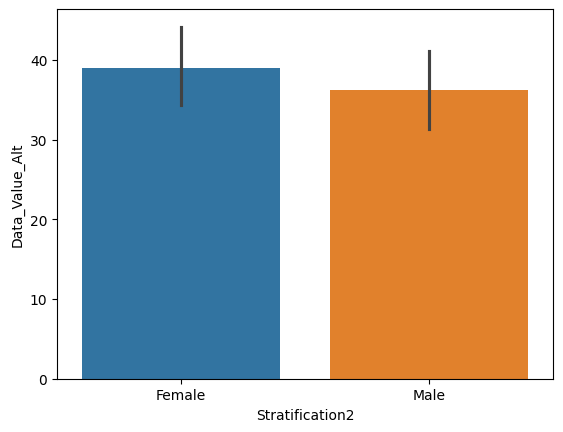

In [9]:
df_gender = df2[(df2['Stratification2'] == 'Female') | (df2['Stratification2'] == 'Male')] 
sns.barplot(data = df_gender, x = 'Stratification2', y = 'Data_Value_Alt', hue = 'Stratification2')
plt.show()

### 성별
female(여성)에서 male(남성)의 값이 더 높다고 확인되나 미미한 차이임. 따라서 알츠하이머 환자에서 성별 또한 크게 영향을 미치지 않을 수도 있음.

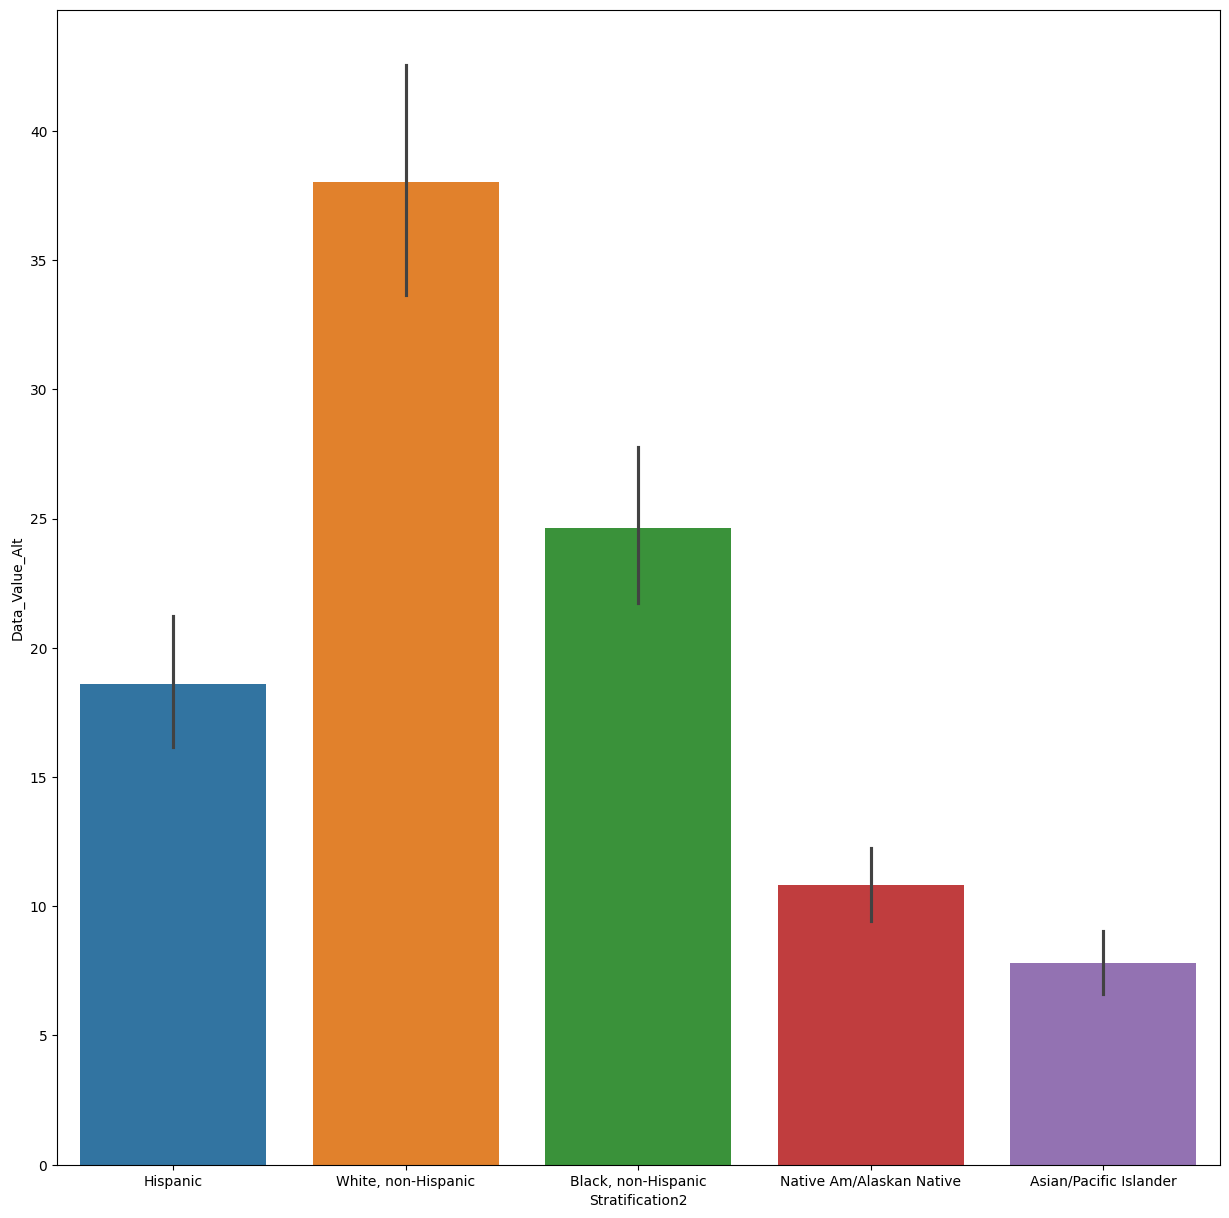

In [10]:
cols = ['Hispanic', 'White, non-Hispanic', 'Black, non-Hispanic', 'Native Am/Alaskan Native', 'Asian/Pacific Islander']
plt.figure(figsize = (15,15))
for col in cols:
    df_ration = df2[(df2['Stratification2'] == col)]
    sns.barplot(data = df_ration, x = 'Stratification2', y = 'Data_Value_Alt')
plt.show()

### 인종 #1
Hispanic과 관련이 없는 인종에서는 비교적 낮은 걸로 확인됨. 따라서 Hispanic과 관련 있는 인종에서의 비교를 하고자 함.

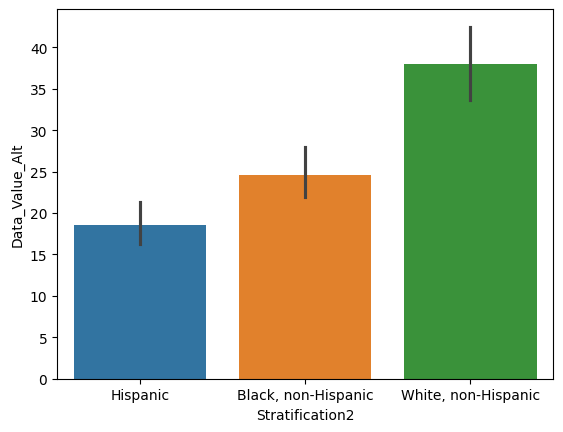

In [11]:
df_ration = df2[(df2['Stratification2'] == 'Hispanic') | (df2['Stratification2'] == 'White, non-Hispanic') | (df2['Stratification2'] == 'Black, non-Hispanic')] 
df_ration = df_ration.sort_values(by = 'Data_Value_Alt')
sns.barplot(data = df_ration, x = 'Stratification2', y = 'Data_Value_Alt', hue = 'Stratification2')
plt.show()

### 인종 #2
Hispanic계의 인종에서 비교적 낮은 값이 관찰되며, non-hispanic게에서는 흑인이 백인보다 낮은 값이 관찰됨.
따라서 non-hispanic계의 백인이 가장 높은 데이터 값을 가지고 있음을 확인할 수 있음.

따라서 Native/Alaskan Native, Asian/Pacific Islander, hispanic, non-hispanic 순으로 알츠하이머에 부정적임.

### Class 분석
Topic을 기준으로 Class가 구성되어 있으므로, Topic과 Class의 관계를 먼저 살펴보았음.
어떤 Topic에 응답을 해야 어느 Class에 속하는지, 또한 alt 값이 어떤지 확인해보고자 함.

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            795 non-null    object 
 1   Topic            795 non-null    object 
 2   Stratification1  795 non-null    object 
 3   Stratification2  795 non-null    object 
 4   Data_Value_Alt   795 non-null    float64
dtypes: float64(1), object(4)
memory usage: 31.2+ KB


In [42]:
df_class = df2.groupby('Class', as_index = False)[['Data_Value_Alt']].mean().sort_values(by = 'Data_Value_Alt', ascending = False)
df_class

,Class,Data_Value_Alt
5,Screenings and Vaccines,37.128216
4,Overall Health,27.463339
0,Caregiving,19.609923
3,Nutrition/Physical Activity/Obesity,18.940649
1,Cognitive Decline,17.129648
2,Mental Health,8.791151
6,Smoking and Alcohol Use,7.258323


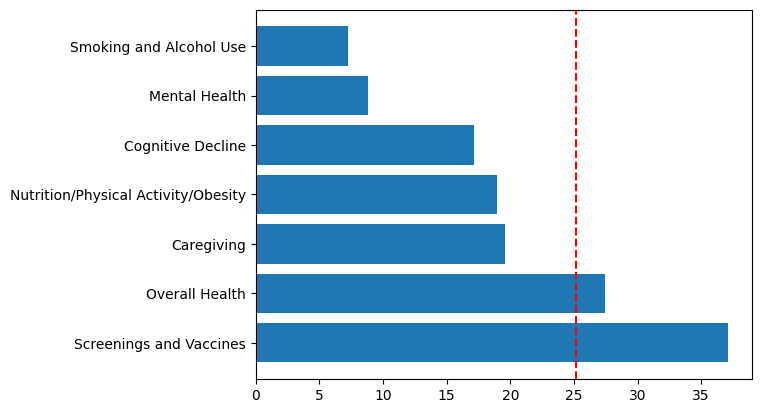

In [51]:
mean = df1.loc[:,'Data_Value_Alt'].mean()

plt.barh(y = df_class['Class'], width = df_class['Data_Value_Alt'])
plt.axvline(x = mean, color='red', linestyle='--') 
plt.show()

전체 평균을 넘는 그룹은 Overall Health 그룹과 Screenings and Vaccines 그룹임.
Screenings and Vaccines 그룹이 가장 높으며 그 후 Overall Health 그룹에서 가장 높음. 그 후 Caregiving과 Nutrition/Physical Acticity/Obesity, cognitive decline 순으로 높지만, 이 세 그룹은 비슷한 수치를 보임.
smoking and alcohol use와 mental health 그룹이 가장 낮으며, 높은 그룹들과 비교했을 시 확연한 차이가 존재함.

따라서 흡연/음주가 알츠하이머에 가장 안좋은 영향을 미치는 것을 파악할 수 있었고, 비만과 인지저하보다도 멘탈이 안 좋은 것이 알츠하이머에 더 안좋은 영향을 미치는 것을 알 수 있음.

구체적으로 어떤 사항이 알츠하이머에 부정적인 영향을 미쳤는지 파악할 필요가 있음.
alt가 낮게 나타난 class부터 살펴볼 예정임.

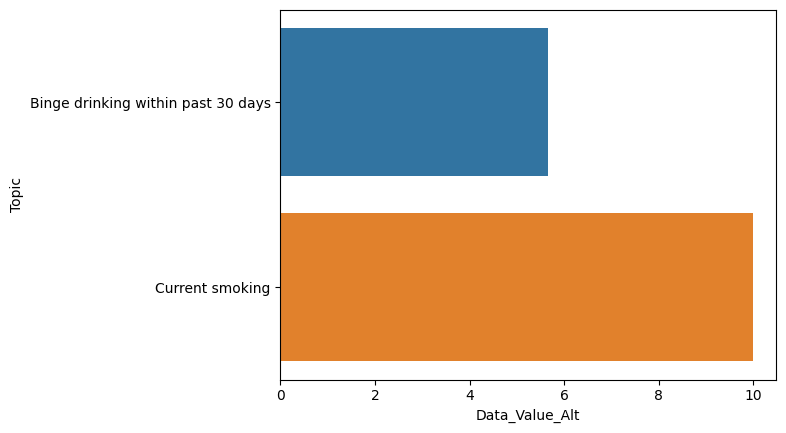

In [98]:
# class 1. Smoking and Alcohol Use
df3 = df2[df2['Class'] == 'Smoking and Alcohol Use']
sns.barplot(x = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Smoking and Alcohol Use class 내에서의 분석
위의 데이터에서 alt가 Current smoking(흡연) 그룹보다 Binge drinking within past 30 days(30일 내 폭음)그룹에서 더 낮은 것을 알 수 있음.

따라서 흡연보다 과음이 알츠하이머에 부정적일 수도 있음.

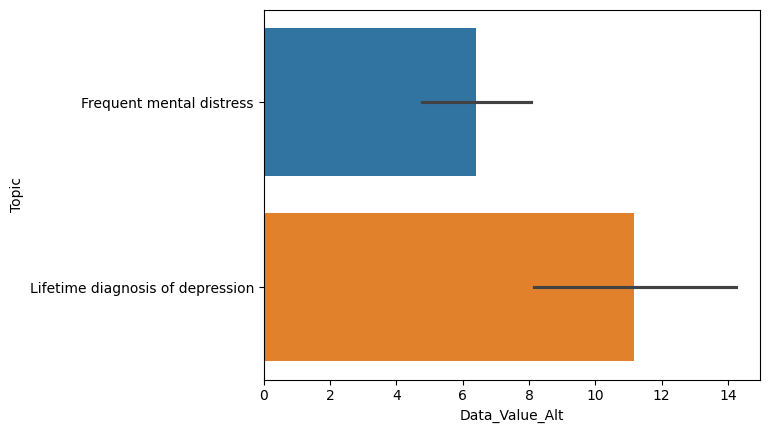

In [124]:
# class 2. Mental Health
df3 = df2[df2['Class'] == 'Mental Health']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Mental Health class 내에서의 분석
위의 데이터에서 alt가 lifetime diagnosis of depression(만성 우울) 그룹보다 Frequent mental distress(빈번한 정신적 고통)그룹에서 더 낮은 것을 알 수 있음.

따라서 만성 우울보다 잦은 우울이 알츠하이머에 부정적일 수도 있음.

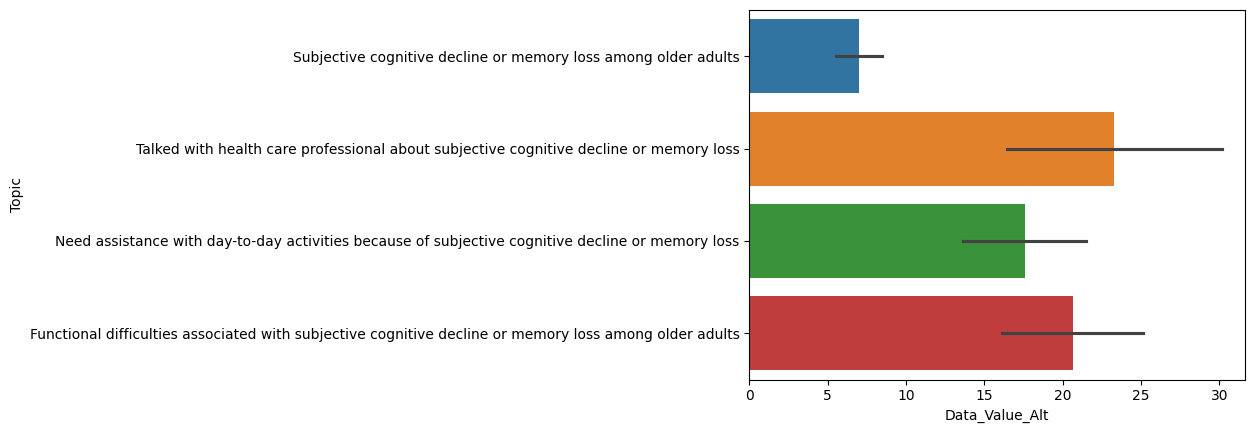

In [126]:
# class 3. Cognitive Decline
df3 = df2[df2['Class'] == 'Cognitive Decline']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Cognitive Decline class 내에서의 분석
위의 데이터에서 older adults와 older aults가 아닌 그룹에서의 비교가 이루어져야 함.

그 결과 older adults의 경우와 아닌 경우 모두, 전문가와 상담한 그룹이 그렇지 않은 (주관적 인지) 그룹보다 alt값이 높음.

따라서 전문가와 상담하는 것이 알츠하이머에 비교적 긍적적인 영향을 미칠 수 있음.

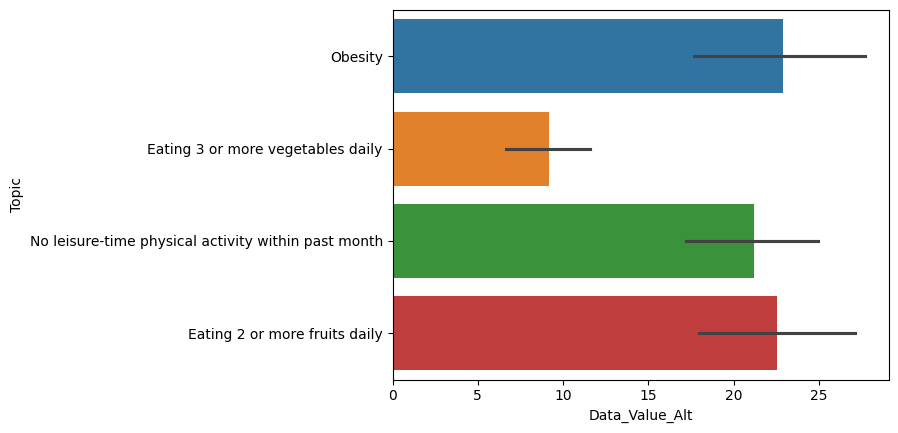

In [132]:
# class 4. Nutrition/Physical Activity/Obesity
df3 = df2[df2['Class'] == 'Nutrition/Physical Activity/Obesity']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Nutrition/Physical Activity/Obesity class 내에서의 분석
eating or more vegetable daily(매일 3번 이상 채소 섭취) 그룹, no leisure time physical activity within past month(최근 여가시간에 신체활동 없음), Obesity(비만), eating or more fruits daily(매일 2번 이상 과일 섭취) 그룹 순으로 alt가 낮음

따라서 채소 3번을 섭취하는 것보다, 과일 2번 섭취하는 것이 알츠하이머에 도움이 될 수 있으며, 만성적으로 움직임이 적은 것(비만)보다 신체적 활동이 줄어드는 것이 알츠하이머에 부정적인 영향을 미칠 수도 있음.

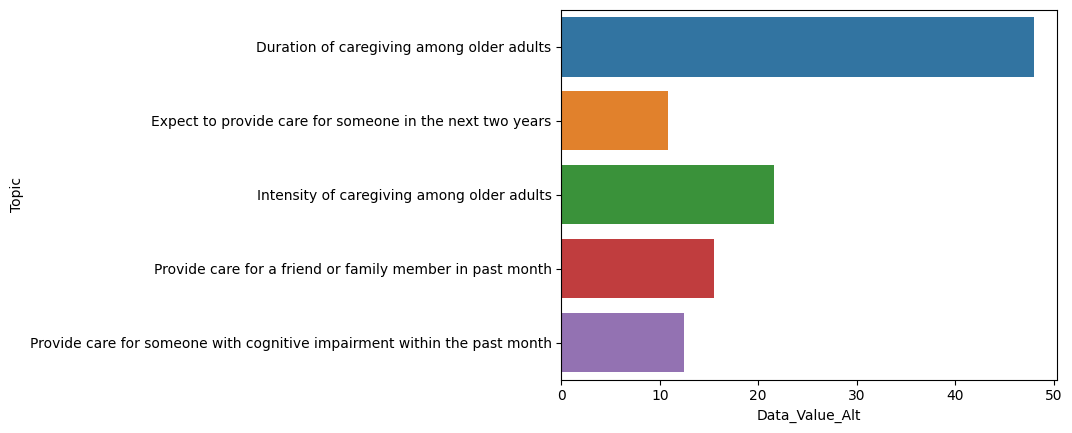

In [93]:
# class 5. Caregiving
df3 = df2[df2['Class'] == 'Caregiving']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Caregiving class 내에서의 분석
expect to provide care for someone in the next two years(보살핌을 기대), provide care for someone ~ (보살핌)하는 그룹에서 alt값이 가장 낮게 나타남.

duration of caregiving among older adults 그룹이 가장 높게 나타남.

따라서 간병을 받을 수록 알츠하이머에 좋은 영향을 미치며, 간병을 기대하거나 간병을 하는 것은 알츠하이머에 부정적인 영향을 미칠 수 있음.

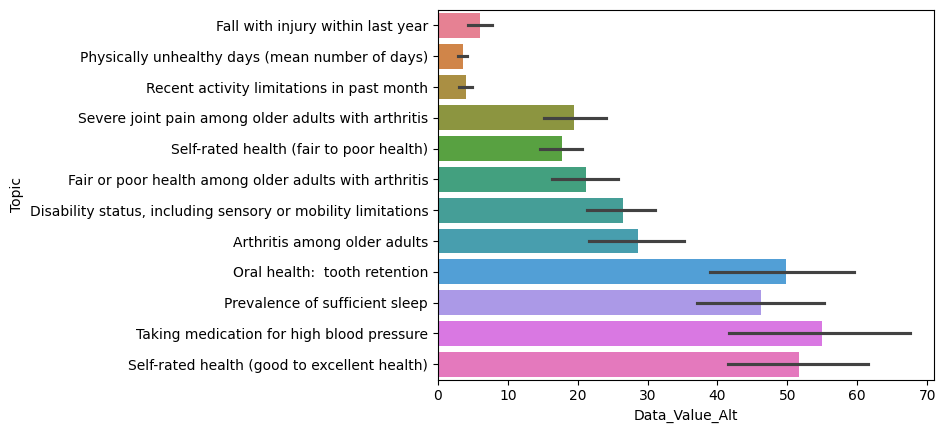

In [118]:
# class 6. Overall Health
df3 = df2[df2['Class'] == 'Overall Health']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### overal health class 내에서의 분석
alt가 가장 낮게 나타난 그룹은 physically unhealthy days(육체적으로 힘든 날이 많음)이며, 그 다음 recent unhealthy days(최근 활동 저하), fall withh injury within last year(부상으로 쓰러짐) 순으로 낮음.

따라서 육체적으로 힘든 날이 많을 수록 알츠하이머에 안좋은 영향을 미치는 것을 알 수 있음. 급격한 활동 저하와 부상으로 쓰러짐 또한 알츠하이머에 좋지 않은 것을 알 수 있음.

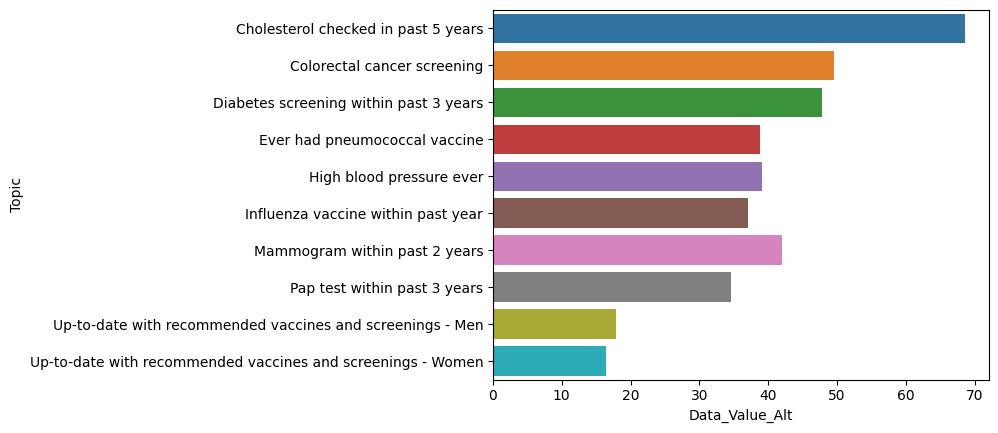

In [92]:
# class 7. Screenings and Vaccines
df3 = df2[df2['Class'] == 'Screenings and Vaccines']
sns.barplot(y = df3['Topic'], x = df3['Data_Value_Alt'], hue = df3['Topic'])
plt.show()

### Screenings and Vaccines class 내에서의 분석
alt가 낮게 나타난 그룹은 up-to-data with recommended vaccines and screenings - women과 men 그룹임  
alt가 높게 나타난 그룹은 cholesterol checked in past 5 years 그룹, cholestrol cancer screening 그룹임

따라서 권장 백신을 접종하는 것보다 당뇨병, 고혈압을 관리하는 것이 긍정적인 영향을 미치며 그 중에서도 콜레스테롤을 관리하는 것이 가장 긍정적인 영향을 미침.

In [37]:
sum = df2['Class'].value_counts().sum()
df_ratio = df2.groupby('Class', as_index = False)[['Data_Value_Alt']].count()
df_ratio['Data_Value_Alt'] = df_ratio['Data_Value_Alt']/sum * 100
df_ratio = df_ratio.rename(columns = {'Data_Value_Alt' : 'ratio'})
df_ratio

,Class,ratio
0,Caregiving,13.207547
1,Cognitive Decline,10.566038
2,Mental Health,5.283019
3,Nutrition/Physical Activity/Obesity,10.566038
4,Overall Health,31.698113
5,Screenings and Vaccines,23.396226
6,Smoking and Alcohol Use,5.283019


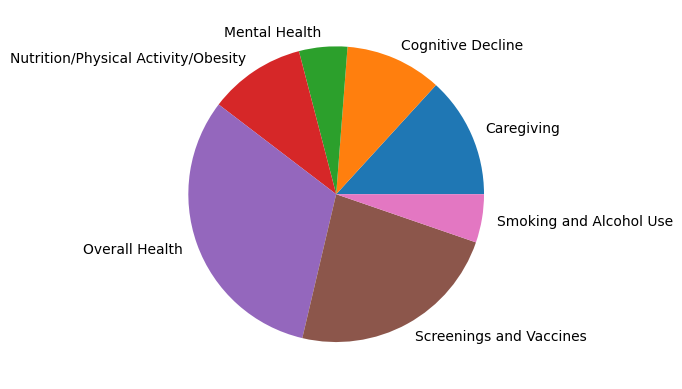

In [55]:
labels = df_ratio['Class']

ax = plt.subplot()
ax.pie(df_ratio['ratio'], labels = labels)
plt.show()

### 현재 각 클래스의 표본의 수가 작음. 따라서 클래스 내에서의 분석 결과는 정확하지 않으며, 신뢰도가 떨어지는 경향이 있음. 또한 클래스 간 크기도 동일하지 않으므로 주의해야 함